# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Mohamad Ripal Perdiansyah
- Email: mohamadripal001@gmail.com
- ID Dicoding: mohamad_ripal

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# Algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Deployment
import joblib
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunankan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Deskripsi Variabel

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

Dataset yang digunakan adalah tentang performa mahasiswa dengan jumlah data sebanyak 4424 baris dan 37 kolom yang terbagi menjadi 36 kolom independen yang akan digunakan untuk melatih model dan 1 kolom yaitu kolom Status sebagai targetnya.

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Dapat dilihat pada dataset ini tidak terdapat _missing value_ sama sekali jadi untuk tahap ini bisa di skip dan langsung ke tahap berikutnya.

In [7]:
print('Jumlah duplikasi berjumlah', df.duplicated().sum())

Jumlah duplikasi berjumlah 0


## Data Visualisation

In [8]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


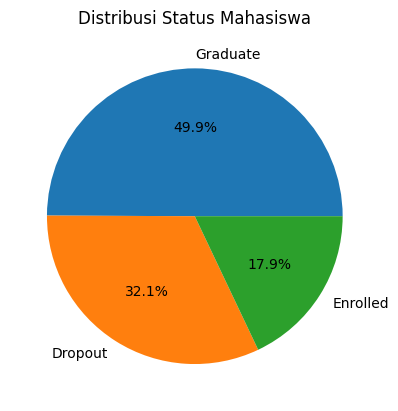

In [9]:
df_target = df['Status'].value_counts()
plt.pie(df_target, labels=df_target.index, autopct='%2.1f%%')
plt.title('Distribusi Status Mahasiswa')
plt.show()

Berdasarkan grafik di atas menunjukkan bahwa proporsi mahasiswa graduate sebesar 49.9% dengan jumlah mahasiswa yang dropout cukup banyak yaitu 32.1%

### Gender dan Status Mahasiswa

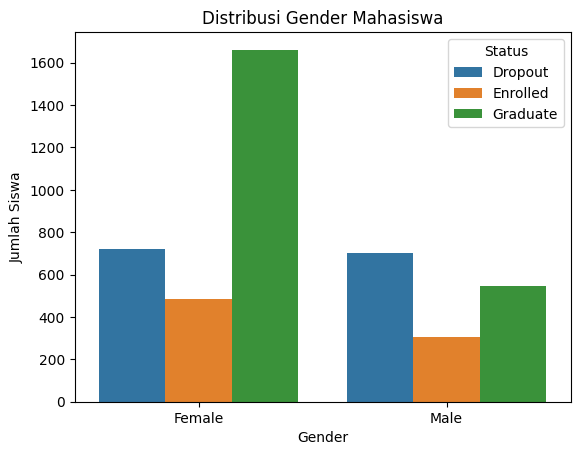

In [10]:
sns.countplot(data=df, x='Gender', hue='Status', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Jumlah Siswa')
plt.title("Distribusi Gender Mahasiswa")
plt.show()

Berdasarkan grafik diatas, perempuan memiliki jumlah lulusan (`Graduate`) dan putus kuliah (`Dropout`) tertinggi dibandingkan dengan laki-laki.

### Marital Status dan Status Mahasiswa

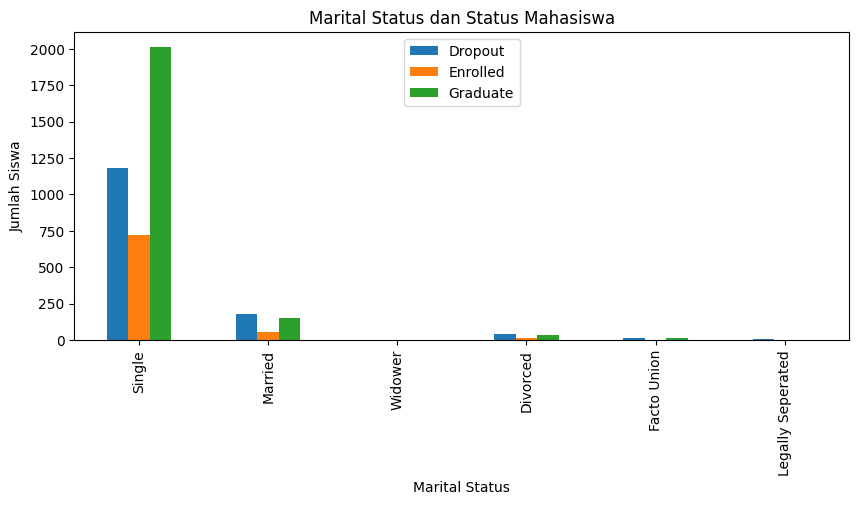

In [11]:
pd.crosstab(df["Marital_status"], df["Status"]).plot(kind="bar", figsize=(10,4), title="Marital Status dan Status Mahasiswa" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Jumlah Siswa')
plt.legend(loc=9)
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa mahasiswa lajang memiliki lebih banyak yang lulus dibandingkan mahasiswa yang menikah dan bercerai memiliki lebih banyak peluang untuk putus kuliah walaupun selisih antara putus kuliah dan kelulusannya kecil.


### Age dan Status Mahasiswa

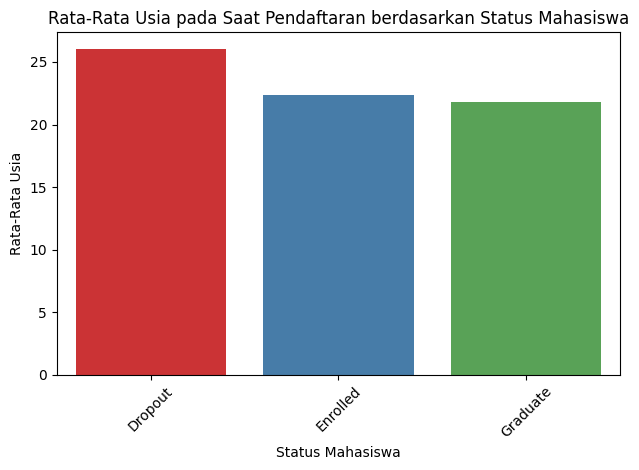

In [12]:
avg_age = df.groupby("Status")["Age_at_enrollment"].mean().reset_index()
sns.barplot(x="Status", y="Age_at_enrollment", data=avg_age, palette="Set1")

plt.title("Rata-Rata Usia pada Saat Pendaftaran berdasarkan Status Mahasiswa")
plt.xlabel("Status Mahasiswa")
plt.ylabel("Rata-Rata Usia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dapat dilihat mahasiswa yang rata-rata umur 25 tahun keatas pada saat pendaftaran cenderung dropout, dibandingkan dengan mahasiswa yang berumur dibawah 25 tahun.

### Course dan Status Mahasiswa

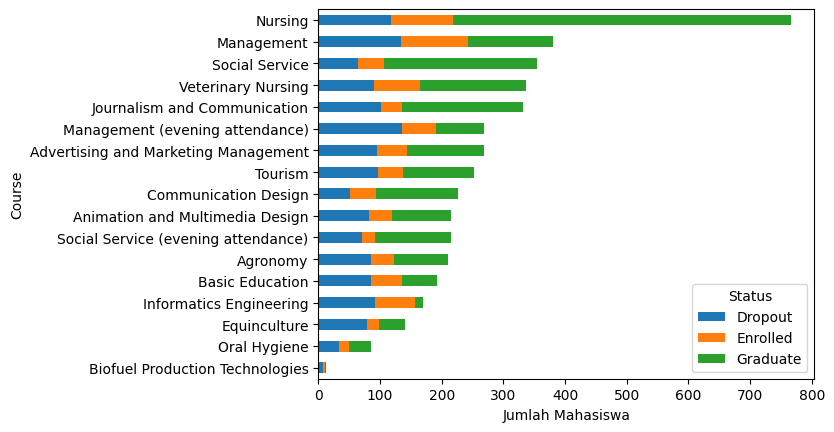

In [13]:
student_course = df.groupby(['Course', 'Status']).size().reset_index().pivot(columns='Status', index='Course', values=0)

student_course = student_course.rename(
    index={
        33: "Biofuel Production Technologies",
        171: "Animation and Multimedia Design",
        8014: "Social Service (evening attendance)",
        9003: "Agronomy",
        9070: "Communication Design",
        9085: "Veterinary Nursing",
        9119: "Informatics Engineering",
        9130: "Equinculture",
        9147: "Management",
        9238: "Social Service",
        9254: "Tourism",
        9500: "Nursing",
        9556: "Oral Hygiene",
        9670: "Advertising and Marketing Management",
        9773: "Journalism and Communication",
        9853: "Basic Education",
        9991: "Management (evening attendance)",
    }
)

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Jumlah Mahasiswa')
plt.show()

Status mahasiswa juga dipengaruhi oleh _course_ yang dijalani, dapat dilihat persebaran data pada grafik diatas sangat beragam, course `nursing` sendiri memiliki status `Graduate` tertinggi, lalu `Management (evening attendance)`	dan `management` memiliki tingkat `Dropout` yang tinggi.

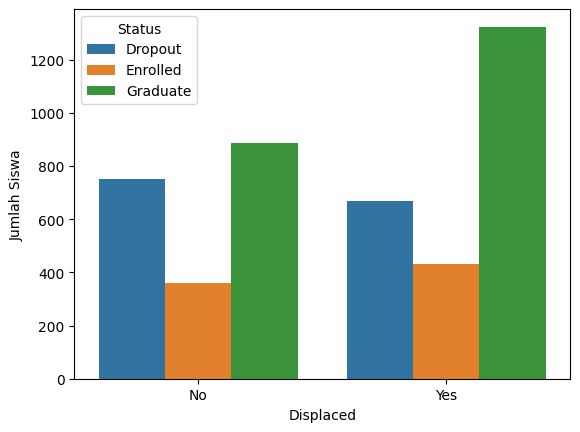

In [14]:
sns.countplot(data=df, x='Displaced', hue='Status', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Jumlah Siswa')
plt.show()

Mahasiswa yang sudah lulus (`Graduate`) sebagian besar adalah mahasiswa yang terlantar (`Displaced`)

### Educational Special Needs dan Status Mahasiswa

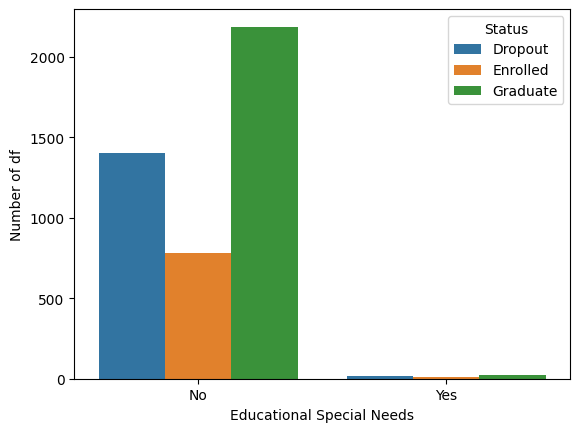

In [15]:
sns.countplot(data=df, x='Educational_special_needs', hue='Status', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of df')
plt.show()

Mahasiswa yang lulus (`Graduate`) dan tidak lulus (`Dropout`) hampir semuanya tidak memiliki kebutuhan khusus.

### Debtor dan Status Mahasiswa

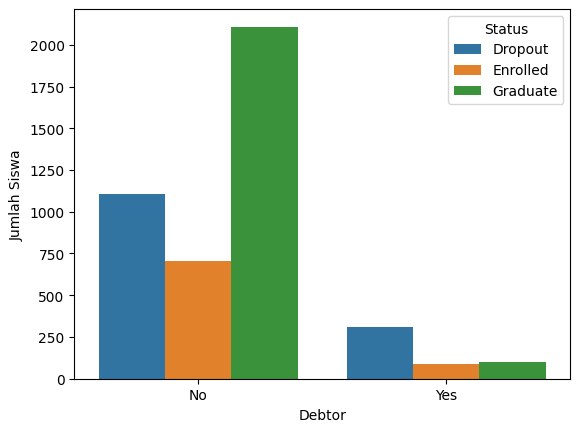

In [16]:
sns.countplot(data=df, x="Debtor", hue='Status', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Jumlah Siswa')
plt.show()

Banyak mahasiswa yang tidak memiliki hutang kuliah baik yang terdaftar (`Enrolled`) maupun lulus (`Graduate`), sementara hanya sedikit mahasiswa yang memiliki hutang kuliah untuk yang terdaftar (`Enrolled`) dan putus kuliah (`Dropout`).

### Scholarship Holder dan Status Mahasiswa

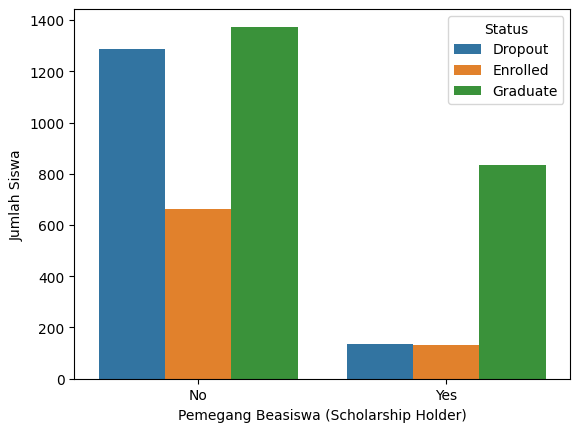

In [17]:
sns.countplot(data=df, x="Scholarship_holder", hue='Status', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Pemegang Beasiswa (Scholarship Holder)')
plt.ylabel('Jumlah Siswa')
plt.show()

Dari grafik di atas, kita dapat menyimpulkan bahwa mahasiswa dengan beasiswa memiliki peluang lebih tinggi untuk lulus (`Graduate`) dibandingkan dengan yang putus kuliah.

## Data Preparation / Preprocessing

Dengan banyaknya fitur yang, saya kelompokkan untuk menemukan korelasinya dengan variabel target

In [18]:
# Demografi
demo_data = df[
    [
        "Marital_status",
        "Nacionality",
        "Displaced",
        "Gender",
        "Age_at_enrollment",
        "International",
        "Status",
    ]
]

# Sosial-ekonomi
se_data = df[
    [
        "Mothers_qualification",
        "Fathers_qualification",
        "Mothers_occupation",
        "Fathers_occupation",
        "Educational_special_needs",
        "Debtor",
        "Tuition_fees_up_to_date",
        "Scholarship_holder",
        "Status",
    ]
]

# Makro Ekonomi
me_data = df[
    [
        "Unemployment_rate",
        "Inflation_rate",
        "GDP",
        "Application_mode",
        "Application_order",
        "Course",
        "Daytime_evening_attendance",
        "Previous_qualification",
        "Status",
    ]
]

# Akademik
academic_data = df[
    [
        "Curricular_units_1st_sem_credited",
        "Curricular_units_1st_sem_enrolled",
        "Curricular_units_1st_sem_evaluations",
        "Curricular_units_1st_sem_approved",
        "Curricular_units_1st_sem_grade",
        "Curricular_units_1st_sem_without_evaluations",
        "Curricular_units_2nd_sem_credited",
        "Curricular_units_2nd_sem_enrolled",
        "Curricular_units_2nd_sem_evaluations",
        "Curricular_units_2nd_sem_approved",
        "Curricular_units_2nd_sem_grade",
        "Curricular_units_2nd_sem_without_evaluations",
        "Status",
    ]
]

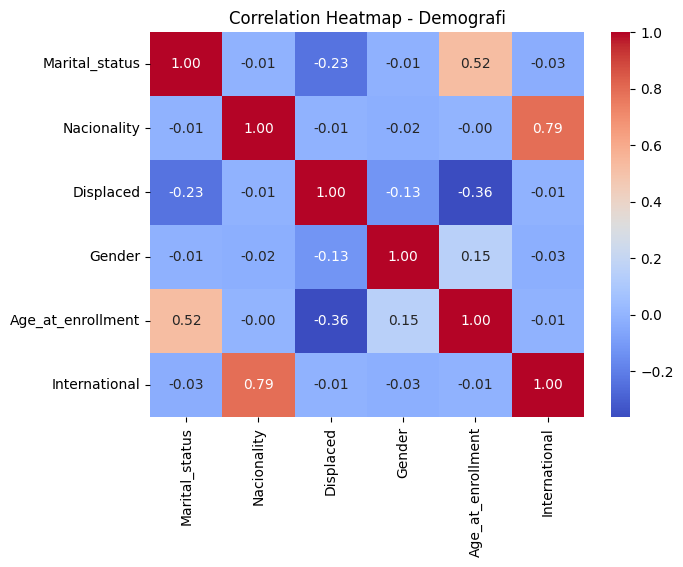

In [19]:
numeric_demo_data = demo_data.select_dtypes(include="number")
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_demo_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Demografi")
plt.show()

`International` and `Nacionality` memiliki korelasi 0,79 sementara semua fitur lainnya tampak normal korelasinya dengan variabel Target.

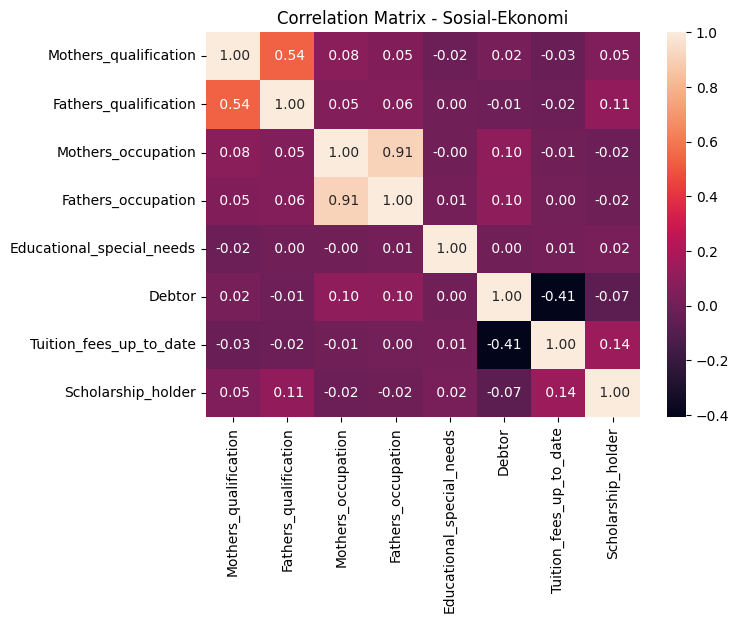

In [20]:
# Socio-economic data
numeric_se_data = se_data.select_dtypes(include="number")

plt.figure(figsize=(7,5))

sns.heatmap(numeric_se_data.corr(), annot=True, fmt=' .2f')

plt.title('Correlation Matrix - Sosial-Ekonomi')

plt.show()

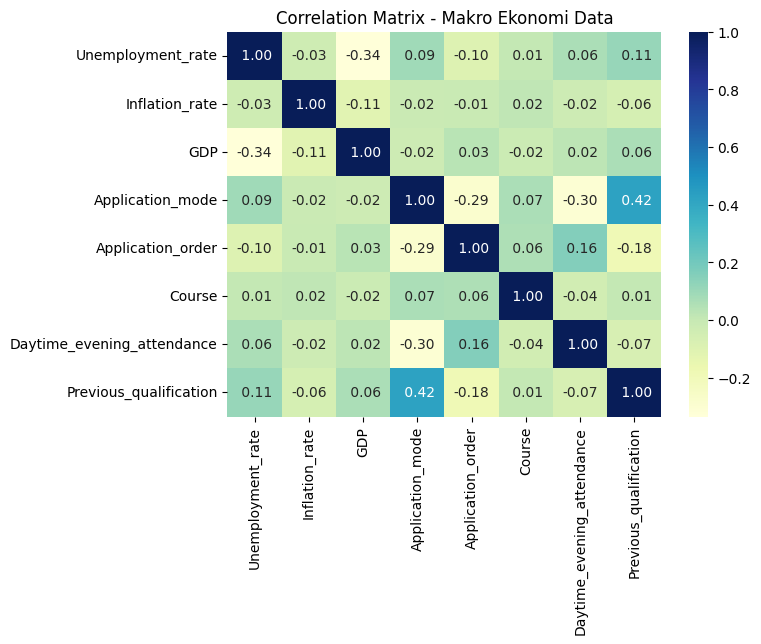

In [21]:
# Macro-Economic Data
numeric_me_data = me_data.select_dtypes(include="number")


plt.figure(figsize=(7,5))

sns.heatmap(numeric_me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')

plt.title('Correlation Matrix - Makro Ekonomi Data')

plt.show()

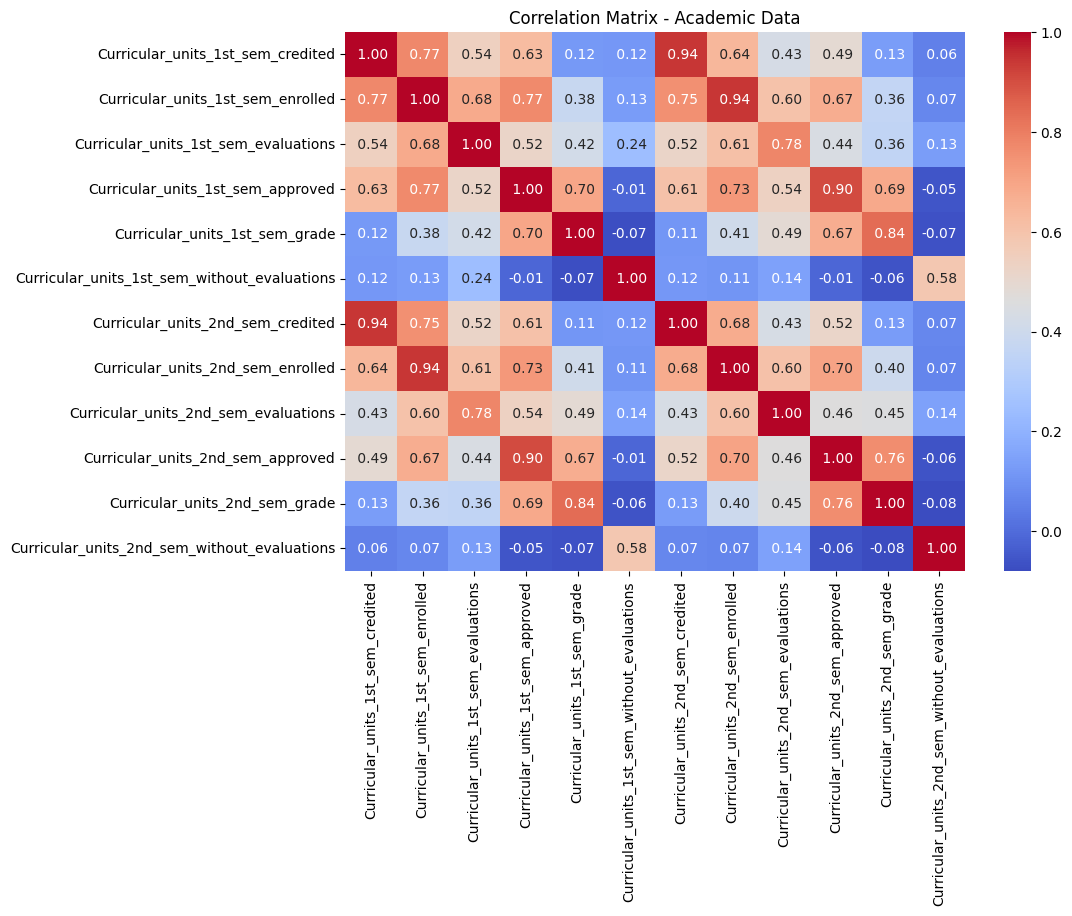

In [22]:
# Academic Data
numeric_academic_data = academic_data.select_dtypes(include="number")

plt.figure(figsize=(10,7))

sns.heatmap(numeric_academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')

plt.title('Correlation Matrix - Academic Data')

plt.show()

Untuk mengurangi redundansi dan potensi overfitting dalam dataset, saya mengelompokkan dan menghapus fitur-fitur yang memiliki korelasi yang sama, diantaranya:

`Curricular_units_1st_sem_credited` berkorelasi dengan sem 2 = 0.94

`Curricular_units_1st_sem_enrolled` berkorelasi dengan sem 2 = 0.94

`Curricular_units_1st_sem_evaluation` berkorelasi dengan sem 2 = 0.78

`Curricular_units_1st_sem_approved` berkorelasi dengan sem 2 = 0.90

`Curricular_units_1st_sem_grade` berkorelasi dengan sem 2 = 0.84

 Selain itu, data sem 2 tampaknya berkorelasi lebih banyak dengan variabel Target, jadi saya menghapus data sem 1.

In [23]:
features_tobe_removed = []
features_tobe_removed.extend(["Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled",

       "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade"])

features_tobe_removed

['Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade']

In [24]:
df.drop(features_tobe_removed, axis=1, inplace=True)
df.head(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [25]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Karena kita akan memprediksi mahasiswa lulus (`Graduate`) dan putus kuliah (`Droupout`), kategori `Enrolled` tidak kita butuhkan, jadi akan saya hapus.

In [26]:
df = df[df.Status != 'Enrolled']

## Modelling

### Encoding

In [27]:
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Splitting Data

In [28]:
X = df.drop('Status', axis=1)
y = df['Status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pembagian data dilakukan agar mendapatkan dataset train dan juga test dengan proporsi 80% dan 20%

### Feature Scaling


In [30]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [31]:
def models(X_train, y_train):

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)


    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    return lr, dt, knn

lr, dt, knn = models(X_train, y_train)

# Prediksi
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)

### Model Evaluation

In [32]:
def evaluate_models(X_test, y_test, models):
    results = []
    for name, model in models.items():

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    return pd.DataFrame(results)

#### Logistic Regression

In [33]:
models = {"Logistic Regression": lr}
results_df = evaluate_models(X_test, y_test, models)
print(results_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.856749   0.837573  0.953229


#### K-Nearest Neighbors

In [34]:
models = {"Decision Tree": dt }
results_df = evaluate_models(X_test, y_test, models)
print(results_df)

           Model  Accuracy  Precision    Recall
0  Decision Tree  0.847107   0.875556  0.877506


#### Decision Tree Classifier

In [35]:
models = {"K-Nearest Neighbors": knn }
results_df = evaluate_models(X_test, y_test, models)
print(results_df)

                 Model  Accuracy  Precision    Recall
0  K-Nearest Neighbors  0.752066   0.766337  0.861915


### Hyper Parameter Tuning

In [36]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [37]:
def grid_search(model, folds, params, scoring):
    grid_search = GridSearchCV(model,
                                cv=folds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=1,
                                verbose=1)
    return grid_search

In [38]:
def print_best_score_params(model):
    print('Best Score: ', model.best_score_)
    print('Best Hyperparameters: ', model.best_params_)

In [39]:

log_reg = LogisticRegression()
log_params = {
    'C': [0.01, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'saga']

}
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

In [40]:
grid_search_log.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             verbose=1)

In [41]:
print_best_score_params(grid_search_log)

Best Score:  0.9087465564738293
Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
lr = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [43]:
y_pred = lr.predict(X_test)

In [44]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9022038567493113


In [45]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_params = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30],
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

In [46]:
grid_search_dtc.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 30]},
             scoring='roc_auc_ovr', verbose=1)

In [47]:
print_best_score_params(grid_search_dtc)

Best Score:  0.9245972067705023
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 30}


In [48]:
dtc = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [49]:
dtc_y_pred = dtc.predict(X_test)

In [50]:
print('Accuracy: ', accuracy_score(y_test, dtc_y_pred))

Accuracy:  0.9008264462809917


In [51]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
grid_search_params = {
    'n_neighbors' : [1,2,3,4,8,9,14,19,20,25],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
    }

In [52]:
grid_search_knn = GridSearchCV(knn, grid_search_params, cv=10, scoring="accuracy")
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors=8, weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 8, 9, 14, 19, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
print("Best parameters:",grid_search_knn.best_estimator_)
print("Best score :",grid_search_knn.best_score_)

Best parameters: KNeighborsClassifier(n_neighbors=8)
Best score : 0.7451641189714422


In [54]:
results = []

# Logistic Regression
results.append(
    {
        "Model": "Logistic Regression",
        "Best Score": grid_search_log.best_score_,
        "Best Parameters": grid_search_log.best_params_,
    }
)
# Decision Tree
results.append(
    {
        "Model": "Decision Tree",
        "Best Score": grid_search_dtc.best_score_,
        "Best Parameters": grid_search_dtc.best_params_,
    }
)
# K-Nearest Neighbors
results.append(
    {
        "Model": "K-Nearest Neighbors",
        "Best Score": grid_search_knn.best_score_,
        "Best Parameters": grid_search_knn.best_params_,
    }
)
results_df = pd.DataFrame(results)

results_df

,Model,Best Score,Best Parameters
0,Logistic Regression,0.908747,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
1,Decision Tree,0.924597,"{'max_depth': 5, 'min_samples_leaf': 30}"
2,K-Nearest Neighbors,0.745164,"{'algorithm': 'auto', 'n_neighbors': 8, 'weigh..."


### Menyimpan Model Terbaik

In [55]:
models = [
    (
        "Logistic Regression",
        grid_search_log.best_score_,
        grid_search_log.best_estimator_,
    ),
    ("Decision Tree", grid_search_dtc.best_score_, grid_search_dtc.best_estimator_),
    (
        "K-Nearest Neighbors",
        grid_search_knn.best_score_,
        grid_search_knn.best_estimator_,
    ),
]

best_model_name, best_model_score, best_model = max(models, key=lambda x: x[1])

filename = f"model.joblib"
joblib.dump(best_model, filename)

print("Model terbaik:")
print(f"Nama Model : {best_model_name}")
print(f"Skor       : {best_model_score:.4f}")

Model terbaik:
Nama Model : Decision Tree
Skor       : 0.9246


### Menyimpan Dataset dan Requirement

In [56]:
df.to_csv("dataset_for_dashboard.csv", index=False)